We want to stipulate a polyhedron 
$$|x_i - x_j| \leq d_{i,j}$$

given by 

$$d = (d_{12}, d_{13}, d_{23}) = (1,1,1)$$

We immediately translate this in the system of absolute-valued algebraic inequalities: 

$$\begin{cases}
|x_1 - x_2| \leq 1 \\
|x_1 - x_3| \leq 1 \\
|x_2 - x_3| \leq 1 
\end{cases}$$

Expanding this to remove the complexity of the inequality, we get: 

$$\begin{cases}
x_1 - x_2 \leq 1 \\
x_2 - x_1 \leq 1 \\
x_1 - x_3 \leq 1 \\
x_3 - x_1 \leq 1 \\
x_2 - x_3 \leq 1 \\
x_3 - x_2 \leq 1 
\end{cases}$$

Lastly, in order for our polynomial to be within $\mathbb R^n \setminus \mathbb R (1,1,1)$, we stipulate that 

$$x \perp (1,1,1) \implies x \cdot (1,1,1) = 0 \implies x_1 + x_2 + x_3 = 0$$

Therefore, we have a polynomial defined as the following: 

$$P = \{ x \in \mathbb R^3: Ax \leq b, c^T x = 0\}$$

where 

$$A = \begin{pmatrix} 
1 & -1 & 0 \\
-1 & 1 & 0 \\
1 & 0 & -1 \\
-1 & 0 & 1 \\
0 & 1 & -1 \\
0 & -1 & 1 
\end{pmatrix}$$

$$b = \begin{pmatrix}
1 \\ 
1 \\
1 \\
1 \\
1 \\
1
\end{pmatrix}$$

and 


$$c = \begin{pmatrix}
1 \\ 
1 \\
1 
\end{pmatrix}$$

Now, a strange behavior of Sage is that it wants it's inequalities to be specfied in the following way: 

$$d + Ex \geq 0$$

$$f + Gx = 0$$

Therefore, we need to transform the above as follows: 

$$Ax \leq b \implies b - Ax \geq 0 $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def create_vector(a,b,step):
    new_vec = []
    curr_val = a
    while curr_val < b:
        new_vec.append(curr_val)
        curr_val += step
        
    return new_vec

def linear_transform(start, end, time):
    
    return time * end + (1 - time) * start

In [2]:
a_1 = [1,-1,1,0]
a_2 = [1,1,-1,0]
a_3 = [1,-1,0,1]
a_4 = [1,1,0,-1]
a_5 = [1,0,-1,1]
a_6 = [1,0,1,-1]

In [3]:
P = Polyhedron(ieqs=[a_1,a_2,a_3,a_4,a_5,a_6], eqns=[[0,1,1,1]])

In [4]:
V = []
for v in P.Vrepresentation():
    V.append(v.vector())

In [5]:
V

[(1/3, -2/3, 1/3),
 (1/3, 1/3, -2/3),
 (2/3, -1/3, -1/3),
 (-1/3, 2/3, -1/3),
 (-2/3, 1/3, 1/3),
 (-1/3, -1/3, 2/3)]

Now the Dual is defined to be: 

$$P^* = \{ x \in \mathbb R^3 : B x \leq 1, c^T x = 0 \} = \{ x \in \mathbb R^3 : 1 - B x \geq 0, c^T x = 0 \}$$

where 

$$B = \begin{pmatrix}
1/3 & -2/3 & 1/3 \\
 1/3 & 1/3 & -2/3 \\
 2/3 & -1/3 & -1/3 \\
 -1/3 & 2/3 & -1/3 \\
 -2/3 & 1/3 & 1/3 \\
 -1/3 & -1/3 & 2/3
\end{pmatrix}$$

In [6]:
b_1 = [1, -V[0][0], -V[0][1], -V[0][2]]
b_2 = [1, -V[1][0], -V[1][1], -V[1][2]]
b_3 = [1, -V[2][0], -V[2][1], -V[2][2]]
b_4 = [1, -V[3][0], -V[3][1], -V[3][2]]
b_5 = [1, -V[4][0], -V[4][1], -V[4][2]]
b_6 = [1, -V[5][0], -V[5][1], -V[5][2]]

In [7]:
P_star = Polyhedron(ieqs=[b_1, b_2, b_3, b_4, b_5, b_6], eqns=[[0,1,1,1]])

In [16]:
P_star.Vrepresentation()

(A vertex at (0, 1, -1),
 A vertex at (1, -1, 0),
 A vertex at (1, 0, -1),
 A vertex at (0, -1, 1),
 A vertex at (-1, 0, 1),
 A vertex at (-1, 1, 0))

In [8]:
D = []
for d in P_star.Vrepresentation():
    D.append(d.vector())

In [9]:
D

[(0, 1, -1), (1, -1, 0), (1, 0, -1), (0, -1, 1), (-1, 0, 1), (-1, 1, 0)]

<IPython.core.display.Javascript object>


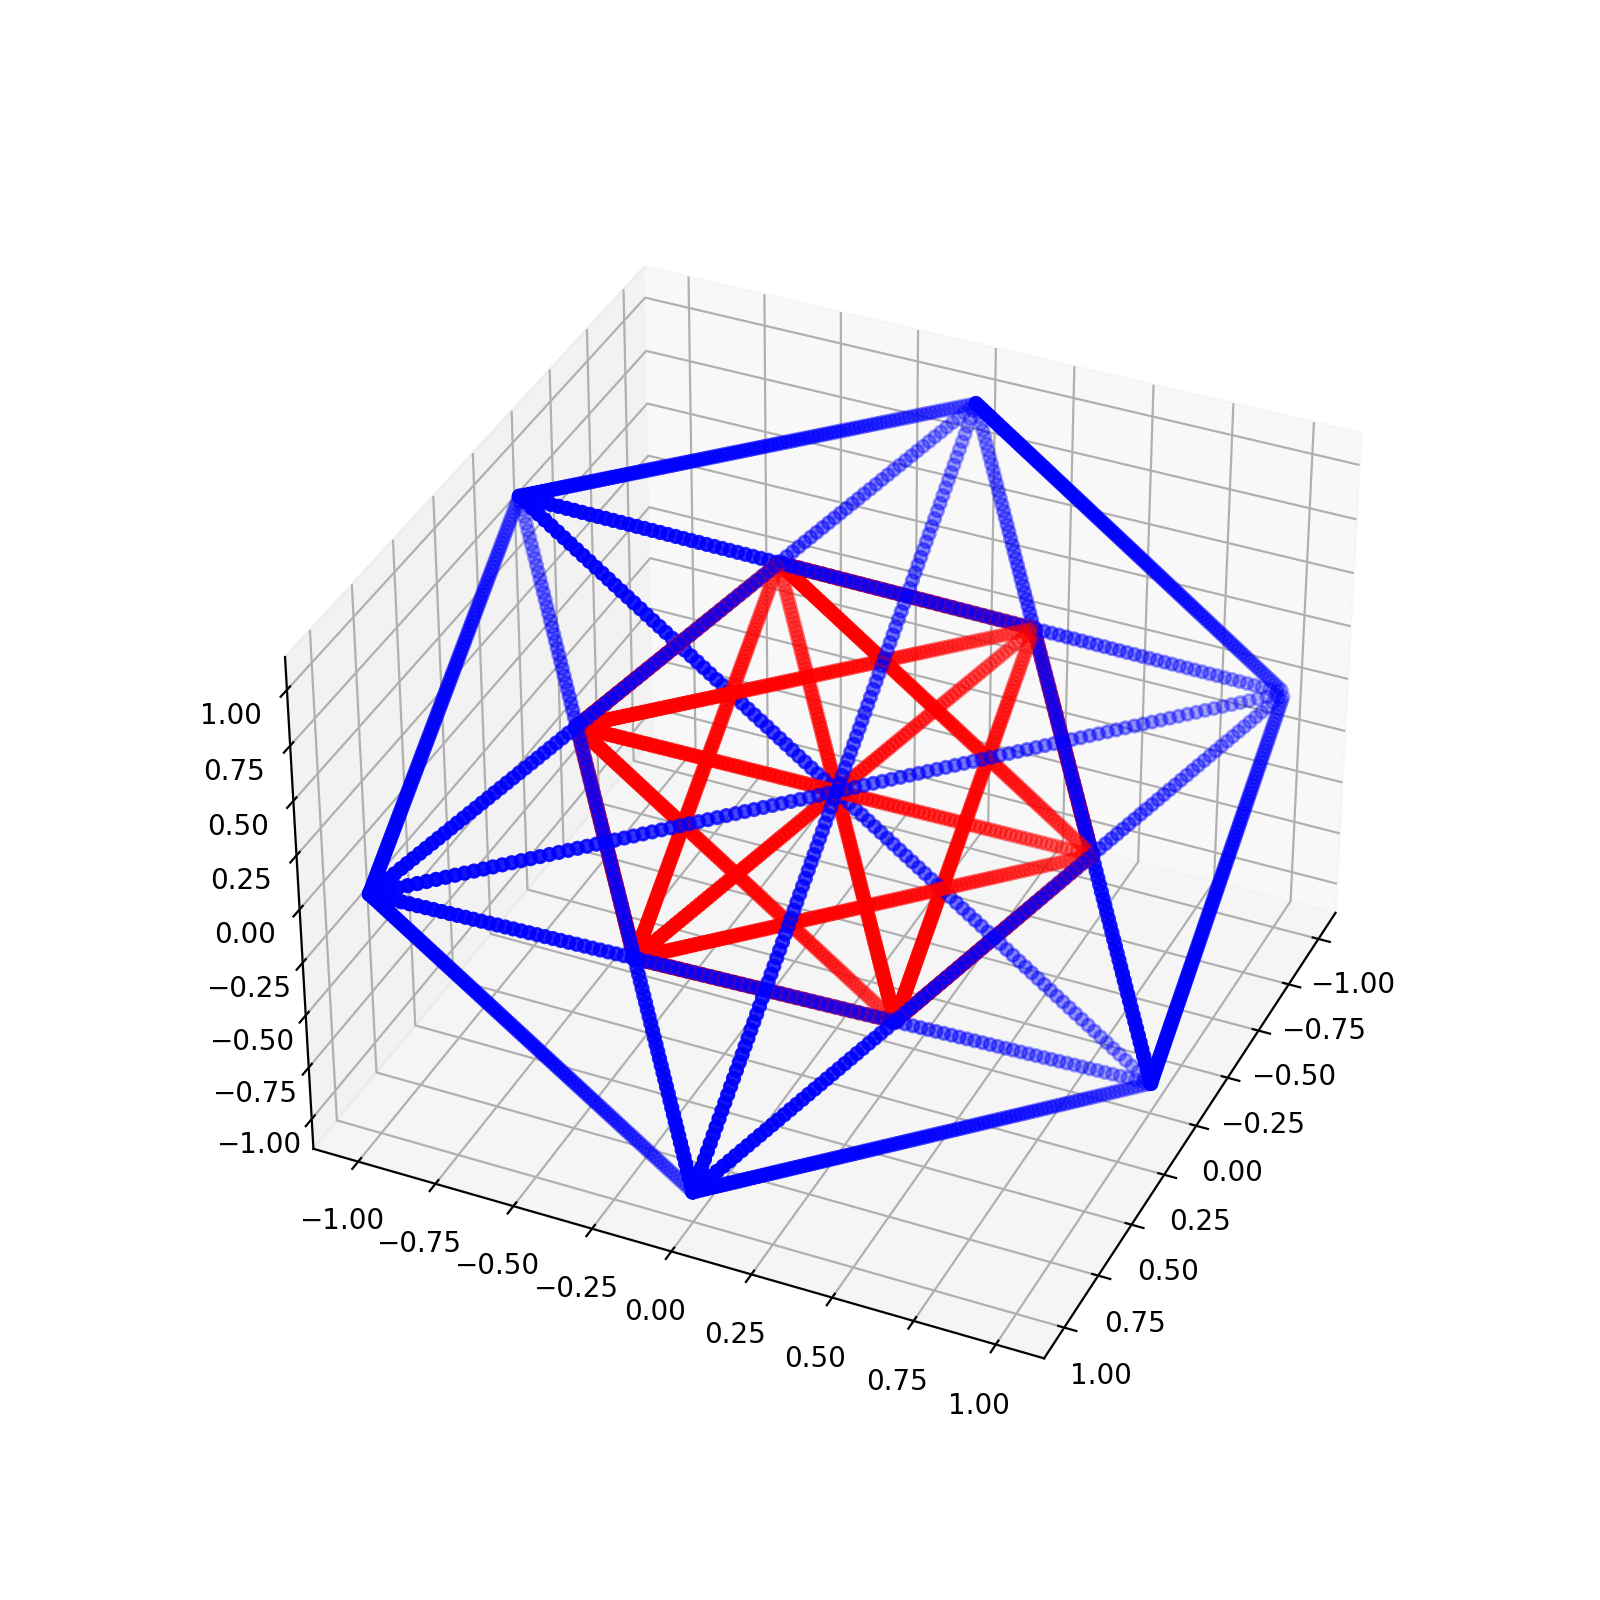

In [12]:
%matplotlib notebook

T = create_vector(0,1,0.01)

primal_bounds = []

for i in range(len(V)): 
    for j in range(len(V)):
        if i < j:
            primal_bounds.append(np.array(list(map(lambda t : linear_transform(V[i], V[j], t),T))))

dual_bounds = []

for i in range(len(D)): 
    for j in range(len(D)):
        if i < j:
            dual_bounds.append(np.array(list(map(lambda t : linear_transform(D[i], D[j], t),T))))

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')

for i in range(len(primal_bounds)):
    ax.scatter3D(primal_bounds[i][:,0], primal_bounds[i][:,1], primal_bounds[i][:,2], color='red')
for i in range(len(dual_bounds)):
    ax.scatter3D(dual_bounds[i][:,0], dual_bounds[i][:,1], dual_bounds[i][:,2], color='blue')